In [1]:
import pandas as pd

In [ ]:
# reduced to 1000 rows, AND truncated questions, I want original

In [6]:
df_q = pd.read_csv("q_pair_docid.csv")
df_d = pd.read_csv("d_pair_docid.csv")

In [7]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question             1901 non-null   object
 1   document_identifier  1901 non-null   object
dtypes: object(2)
memory usage: 29.8+ KB


In [9]:
df_q.tail()

,question,document_identifier
1896,trying to find out what CPU's actually work in...,doc_1896
1897,trying to upgrade the hdd and reinstall server...,doc_1897
1898,v2.20Only recently getting cmc redundancy loss...,doc_1898
1899,we had to move a server from one building to a...,doc_1899
1900,¡hola!Ayer estaba actualizando varios firmware...,doc_1900


In [10]:
df_d.head()

,document_text,document_identifier,order
0,With VRTX system in order for ESXi to recogniz...,doc_0,0
1,iDRAC will apply the firmware correctly to res...,doc_1,1
2,"Hello.Unfortunately, we are not able to open t...",doc_2,2
3,"Thank you for the service tag.You are correct,...",doc_3,3
4,"Hello thisisalloneword, While you have access ...",doc_4,4


In [11]:
df_og = pd.read_csv("QA_large_cleaned.csv")


In [12]:
df_og = df_og.replace('\n','', regex=True)
df_og = df_og.replace('\n\n','', regex=True)

In [13]:
# haystack format prep

df_og = df_og.rename(columns={'Questions': 'question', 'Answers': 'document_text'})

# Step 2: Organize 'question' rows in alphabetical order
df_og = df_og.sort_values('question')

# Step 3: Add an 'order' column with the row order
df_og = df_og.reset_index(drop=True)  # Reset index first without keeping old
df_og['order'] = df_og.index  # Add order column

# Step 4: Add a 'document_identifier' column using 'order' numbers
df_og['document_identifier'] = 'doc_' + df_og['order'].astype(str)

In [14]:

# Assuming df_og is your original DataFrame

# Take the first 1000 rows of the DataFrame
#df_og = df_og.iloc[:1000]

# Step 1: Remove specific substrings from all columns
df_og_replaced = df_og.replace(['\t', 'Solved!', 'Go to Solution.'], ['', '', ''], regex=True)

# Step 2: Trim 'question' column if longer than 255 characters
#df_og_trimmed = df_og_replaced.copy()
#df_og_trimmed['question'] = df_og_replaced['question'].apply(lambda x: x[:255] if len(x) > 255 else x)

# Step 3: Export 'question' and 'document_identifier' columns to q_pair_docid.csv
df_q_export = df_og_replaced[['question', 'document_identifier']]
df_q_export.to_csv('Questions_original.csv', index=False)

# Step 4: Export 'document_text', 'document_identifier', and 'order' columns to d_pair_docid.csv
df_d_export = df_og_replaced[['document_text', 'document_identifier', 'order']]
df_d_export.to_csv('Documents_original.csv', index=False)

In [15]:
df_d_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document_text        1901 non-null   object
 1   document_identifier  1901 non-null   object
 2   order                1901 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 44.7+ KB


In [16]:
df_q_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question             1901 non-null   object
 1   document_identifier  1901 non-null   object
dtypes: object(2)
memory usage: 29.8+ KB


## Queston length stats

In [42]:
df = df_q_export.copy()

In [43]:
# Get the length of each text entry in 'column_1'
df['text_length'] = df['question'].str.len()

# Calculate average, highest, and lowest length
average_length = df['text_length'].mean()
max_length = df['text_length'].max()
min_length = df['text_length'].min()

# Calculate percentage of entries with length greater than 255 characters
percentage_over_255 = (df[df['text_length'] > 255].shape[0] / df.shape[0]) * 100


In [44]:
print(f"Average Length: {average_length:.2f}")
print(f"Maximum Length: {max_length}")
print(f"Minimum Length: {min_length}")
print(f"Percentage of Texts over 255 characters: {percentage_over_255:.2f}%")


Average Length: 597.39
Maximum Length: 27039
Minimum Length: 0
Percentage of Texts over 255 characters: 79.01%


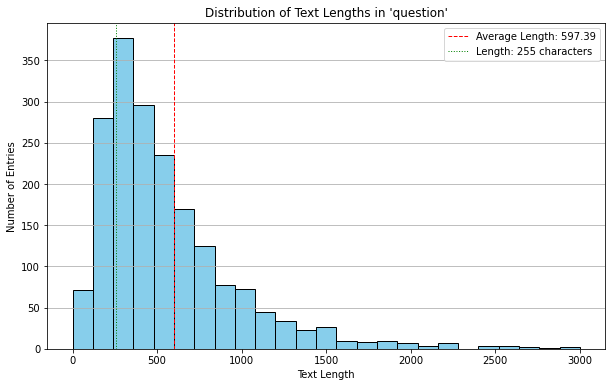

In [47]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'average_length' and have a DataFrame 'df'

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=25, range=(0, 3000), color='skyblue', edgecolor='black')  # Adjusted bins and range
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=1, label=f"Average Length: {average_length:.2f}")
plt.axvline(255, color='green', linestyle='dotted', linewidth=1, label="Length: 255 characters")
plt.title("Distribution of Text Lengths in 'question'")
plt.xlabel('Text Length')
plt.ylabel('Number of Entries')
plt.legend()
plt.grid(axis='y')
plt.show()



## Answer length stats

In [36]:
df = df_d_export.copy()

In [37]:
df.head()

,document_text,document_identifier,order
0,With VRTX system in order for ESXi to recogniz...,doc_0,0
1,iDRAC will apply the firmware correctly to res...,doc_1,1
2,"Hello.Unfortunately, we are not able to open t...",doc_2,2
3,"Thank you for the service tag.You are correct,...",doc_3,3
4,"Hello thisisalloneword, While you have access ...",doc_4,4


In [38]:
# Get the length of each text entry in 'column_1'
df['text_length'] = df['document_text'].str.len()

# Calculate average, highest, and lowest length
average_length = df['text_length'].mean()
max_length = df['text_length'].max()
min_length = df['text_length'].min()

# Calculate percentage of entries with length greater than 255 characters
percentage_over_255 = (df[df['text_length'] > 255].shape[0] / df.shape[0]) * 100


In [39]:
print(f"Average Length: {average_length:.2f}")
print(f"Maximum Length: {max_length}")
print(f"Minimum Length: {min_length}")
print(f"Percentage of Texts over 255 characters: {percentage_over_255:.2f}%")


Average Length: 534.39
Maximum Length: 11345
Minimum Length: 38
Percentage of Texts over 255 characters: 79.33%


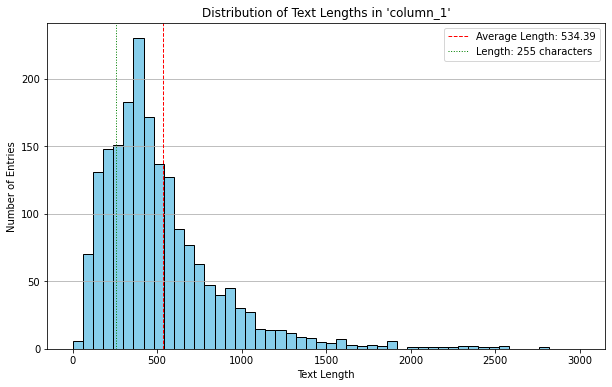

In [40]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'average_length' and have a DataFrame 'df'

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, range=(0, 3000), color='skyblue', edgecolor='black')  # Adjusted bins and range
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=1, label=f"Average Length: {average_length:.2f}")
plt.axvline(255, color='green', linestyle='dotted', linewidth=1, label="Length: 255 characters")
plt.title("Distribution of Text Lengths in 'column_1'")
plt.xlabel('Text Length')
plt.ylabel('Number of Entries')
plt.legend()
plt.grid(axis='y')
plt.show()
